<a href="https://colab.research.google.com/github/rodrigotorresp/Practica-Regresi-n-ML/blob/main/Prac1Samu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
train_dataframe= pd.read_csv("https://raw.githubusercontent.com/rodrigotorresp/Practica-Regresi-n-ML/main/train.csv");
train_dataframe

,LaptopId,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,981,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1195.00
1,996,HP,Spectre 13-V111dx,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.11kg,1349.00
2,77,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,Intel UHD Graphics 620,Windows 10,2.02kg,855.00
3,103,HP,Envy 13-ad009n,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,1.38kg,1119.00
4,946,Dell,Latitude 7280,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics,Windows 10,1.36kg,1472.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,994,Dell,Inspiron 5378,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.68kg,889.00
908,615,Asus,FX753VD-GC007T (i7-7700HQ/8GB/1TB,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3kg,1168.00
909,1063,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,2TB HDD,AMD Radeon R7 M445,Windows 10,2.32kg,989.99
910,96,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.2kg,599.90


Uno de los problemas que existen con el tratamiento de estos datos es la existencia en algunas columnas de las medidas, es decir, cuando hablamos de peso el string "kg" está presente en todos los valores del dataset, de manera que es imprescindible eliminarlo de primeras

In [93]:
train_dataframe['Weight'] = train_dataframe['Weight'].str.replace('kg$', '')

train_dataframe['SSD'] = 0
train_dataframe['SSD'] = train_dataframe['Memory'].str.replace('.B SDD', '1')
##for i in train_dataframe:
##  if train_dataframe["Memory"]=='\*SSD\*':
 ##   train_dataframe['SSD'] = '1'
  
train_dataframe['HDD'] = train_dataframe['Memory'].str.replace('.B HDD', '')

#No hemos conseguido nada, yujuuuh

##train_dataframe['SSD'] = train_dataframe['Memory'].str.replace('^\*SSD\*', '1')
##train_dataframe['SSD'] = train_dataframe['Memory'].replace({'Memory': r'^\*SSD\*.$'}, {'SSD': '1'}, regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'Full HD', value='', regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'IPS Panel', value='', regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'/ Touchscreen', value='', regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'\*Touchscreen\*', value='', regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'/', value='', regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'4K Ultra HD', value='', regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'\*"+"\*', value='', regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'Quad HD+', value='', regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'\*Retina Display', value='', regex=True)
##La idea de esto es eliminar el texto y dejar solo el 1920x1080 o 2560 × 1440 o 4096 × 2160 para luego hacer un original encoder pero no furula
##Tenía pensado hacer algo parecido con la cpu pero viendo que no funciona como quiero xd


train_dataframe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


,LaptopId,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD
0,981,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,1.2,1195.00,128GB SSD,128GB SSD
1,996,HP,Spectre 13-V111dx,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.11,1349.00,256GB SSD,256GB SSD
2,77,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,Intel UHD Graphics 620,Windows 10,2.02,855.00,128GB SSD + 1TB HDD,128GB SSD + 1
3,103,HP,Envy 13-ad009n,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,1.38,1119.00,256GB SSD,256GB SSD
4,946,Dell,Latitude 7280,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics,Windows 10,1.36,1472.20,256GB SSD,256GB SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,994,Dell,Inspiron 5378,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.68,889.00,256GB SSD,256GB SSD
908,615,Asus,FX753VD-GC007T (i7-7700HQ/8GB/1TB,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3,1168.00,128GB SSD + 1TB HDD,128GB SSD + 1
909,1063,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,2TB HDD,AMD Radeon R7 M445,Windows 10,2.32,989.99,2TB HDD,2
910,96,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.2,599.90,1TB HDD,1


In [45]:
import sklearn.compose
colum_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("Laptop Id" , "drop", [0]),
    ("Company" , "drop", [1]),
    ("Product" , "drop", [2]),
    ("TypeName" , sklearn.preprocessing.OrdinalEncoder(categories=[['Netbook', 'Notebook', 'Ultrabook','Gaming','2 in 1 Convertible','Workstation']]), [3]),
    ("Inches" , "passthrough", [4]),
    ("ScreenResolution" , "drop", [5]),
    ("CPU" , "drop", [6]),
    ("RAM" , sklearn.preprocessing.OrdinalEncoder(categories=[['2GB','4GB', '6GB','8GB','12GB', '16GB', '24GB', '32GB', '64GB']]), [7]),
    ("Memory" , "drop", [8]),
    ("GPU" , "drop", [9]),
    ("OPSYS" , "drop", [10]),
    ("Weight" , "passthrough", [11]),
    ("Price" , "drop", [12])
    ]);


In [46]:
train_dataframe_transform = colum_transformer.fit_transform(train_dataframe)
train_dataframe_transform

array([[1.0, 13.3, 1.0, '1.2'],
       [2.0, 13.3, 3.0, '1.11'],
       [1.0, 15.6, 3.0, '2.02'],
       ...,
       [1.0, 15.6, 5.0, '2.32'],
       [1.0, 15.6, 3.0, '2.2'],
       [1.0, 14.0, 3.0, '1.87']], dtype=object)

In [ ]:
import sklearn.compose
colum_transformer_Scaler = sklearn.compose.ColumnTransformer(transformers=[
    ("TypeNameScaler" , sklearn.preprocessing.StandardScaler(), [0]),
    ("InchesScaler" , sklearn.preprocessing.StandardScaler(), [1]),
    ("RAMScaler" , sklearn.preprocessing.StandardScaler(), [2]),
    ("WeightScaler" , sklearn.preprocessing.StandardScaler(), [3]),
    ]);

train_dataframe_transform2 = colum_transformer_Scaler.fit_transform(train_dataframe_transform)
train_dataframe_transform2

array([[-0.71119323, -1.20960244, -1.19779584, -1.26029362],
       [ 0.15131771, -1.20960244,  0.17455316, -1.39490179],
       [-0.71119323,  0.40762114,  0.17455316, -0.0338636 ],
       ...,
       [-0.71119323,  0.40762114,  1.54690217,  0.41483031],
       [-0.71119323,  0.40762114,  0.17455316,  0.23535275],
       [-0.71119323, -0.71740396,  0.17455316, -0.25821055]])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = train_dataframe_transform2.data
y = train_dataframe.Price

reg = LinearRegression().fit(X, y)
reg.intercept_

1130.0370065789473

In [ ]:
reg.coef_

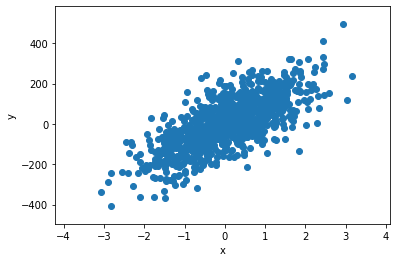

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=912, n_features=4, n_informative=11, n_targets=1)

plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X[:,0], y)

In [ ]:
n,m = X.shape
x0 = np.ones((n,1))
stack = np.hstack((x0, X))

# beta = ((X^t * X)^-1 * X^t) * y
beta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(stack), stack)), np.transpose(stack)), y)
beta

array([-8.88178420e-16,  8.93288527e+01,  1.11313604e+01,  2.21471627e+01,
        8.23913317e+01])

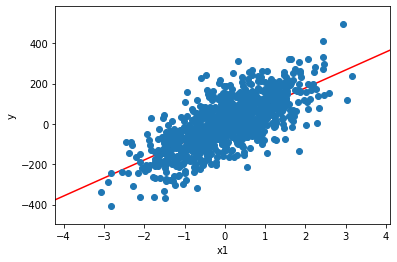

In [ ]:
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x1')
plt.ylabel('y')

plt.scatter(X[:,0], y, zorder=10)

line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, beta[0] + beta[1] * line, c='red')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

ridge = Ridge(alpha=1.0).fit(X, y)

y_pred = ridge.predict(X)

print("MAE: ", mean_absolute_error(y, y_pred))
print("MSE: ", mean_squared_error(y, y_pred))
print("R2: ", ridge.score(X, y))



MAE:  0.1059719396081047
MSE:  0.017817882677067444
R2:  0.9999988818180473


train split probar mae con x_train y_train y con x_test y_test para ver si hay overfitting, el mae de train sera menor que el mae de test, si hay muchos ordenes de magnitud de diferencia puede haber overfitting, si la diferencia el de decenas o centenas no sabemos nada. 

Validación cruzada cv=5 => 5 maes de train y 5 maes de test. Si los errores son muy diferentes entre ellos puede haber

Error cercano a 0 en train te puede estar diciendo que hay overfitting



Terminamos el entrenamiento del modelo y hacemos el pipeline para subir la submission

In [ ]:
test_dataframe= pd.read_csv("https://raw.githubusercontent.com/rodrigotorresp/Practica-Regresi-n-ML/main/test.csv");
test_dataframe;
test_dataframe['Weight'] = test_dataframe['Weight'].str.replace('kg$', '');
colum_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("Laptop Id" , "drop", [0]),
    ("Company" , "drop", [1]),
    ("Product" , "drop", [2]),
    ("TypeName" , sklearn.preprocessing.OrdinalEncoder(categories=[['Netbook', 'Notebook', 'Ultrabook','Gaming','2 in 1 Convertible','Workstation']]), [3]),
    ("Inches" , "passthrough", [4]),
    ("ScreenResolution" , "drop", [5]),
    ("CPU" , "drop", [6]),
    ("RAM" , sklearn.preprocessing.OrdinalEncoder(categories=[['2GB','4GB', '6GB','8GB','12GB', '16GB', '24GB', '32GB', '64GB' ]]), [7]),
    ("Memory" , "drop", [8]),
    ("GPU" , "drop", [9]),
    ("OPSYS" , "drop", [10]),
    ("Weight" , "passthrough", [11]),
    ]);
test_dataframe_transform = colum_transformer.fit_transform(test_dataframe);
colum_transformer_Scaler = sklearn.compose.ColumnTransformer(transformers=[
    ("TypeNameScaler" , sklearn.preprocessing.StandardScaler(), [0]),
    ("InchesScaler" , sklearn.preprocessing.StandardScaler(), [1]),
    ("RAMScaler" , sklearn.preprocessing.StandardScaler(), [2]),
    ("WeightScaler" , sklearn.preprocessing.StandardScaler(), [3]),
    ]);

test_dataframe_transform = colum_transformer_Scaler.fit_transform(test_dataframe_transform);

y_test = ridge.predict(test_dataframe_transform);

compression_opts = dict(method='zip',
                        archive_name='Submission.csv')

submissionDataFrame = pd.DataFrame({"LaptopId": test_dataframe.LaptopId, "price": y_test});
submissionDataFrame.to_csv("Submission.zip", index=False, compression=compression_opts);


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


Intentamos otros modelos

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_X = PolynomialFeatures(degree=3, include_bias=False).fit_transform(train_dataframe_transform)
poly_X

array([[ 1.00000000e+00, -1.20960244e+00, -1.26029362e+00, ...,
        -1.84398356e+00, -1.92125995e+00, -2.00177477e+00],
       [ 2.00000000e+00, -1.20960244e+00, -1.39490179e+00, ...,
        -2.04093390e+00, -2.35358517e+00, -2.71413157e+00],
       [ 1.00000000e+00,  4.07621142e-01, -3.38635985e-02, ...,
        -5.62660605e-03,  4.67436814e-04, -3.88328548e-05],
       ...,
       [ 1.00000000e+00,  4.07621142e-01,  4.14830311e-01, ...,
         6.89261284e-02,  7.01451529e-02,  7.13857370e-02],
       [ 1.00000000e+00,  4.07621142e-01,  2.35352747e-01, ...,
         3.91050346e-02,  2.25785083e-02,  1.30364042e-02],
       [ 1.00000000e+00, -7.17403958e-01, -2.58210553e-01, ...,
        -1.32892822e-01, -4.78312516e-02, -1.72155922e-02]])

ValueError: ignored

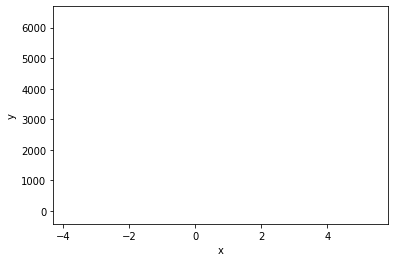

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

min_x = np.min(train_dataframe_transform)
max_x = np.max(train_dataframe_transform)
diff_x = max_x - min_x

min_y = np.min(train_dataframe.Price)
max_y = np.max(train_dataframe.Price)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

#plt.scatter(train_dataframe_transform, train_dataframe.Price)

reg = LinearRegression().fit(poly_X, y)
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x).reshape(-1, 1)
xs = PolynomialFeatures(degree=3, include_bias=False).fit_transform(line)
ys = reg.predict(xs)

plt.plot(xs[:,0], ys, c='red')

plt.show()